# hmmlearn

In [1]:
from hmmlearn import hmm
import numpy as np
import pandas as pd

## 使用的例子
```python
model = hmm.GaussianHMM(n_components=3, covariance_type="full")
model.startprob_ = np.array([0.1, 0.8, 0.1])
model.transmat_ = np.array([[0.8, 0.15, 0.05],
                            [0.05, 0.9, 0.05],
                            [0.05, 0.15, 0.8]])
model.means_ = np.array([[0.0], [3.0], [5.0]])
model.covars_ = np.tile(np.identity(1), (3, 1, 1))
X,Z = model.sample(100)
```

### 数据

1. 输入数据是个3维数据，分别表示`value`,`mean`,`std`
2. 隐含层也包含有3个状态，`-1`,`0`,`1`
3. 通过输入，能够获得隐含层状态

In [2]:
## 测试一个CNV数据

ep=10e-7

pd_data = pd.read_table('./demo_data/CNV.txt',header=-1)
pd_data2 = pd.read_table('./demo_data/FH_1885.cnv.txt',header=-1)
## DataFrame转化为np array 
pd_data.columns=['loc','type','value','mean','std']
pd_data2.columns=['loc','type','value','mean','std']

pd_data['normalized'] = (pd_data['value']-pd_data['mean'])/(pd_data['std']+ep)
pd_data2['normalized'] = (pd_data2['value']-pd_data2['mean'])/(pd_data2['std']+ep)

X_3d = pd_data.iloc[:,2:5].values
X_test_3d = pd_data2.iloc[:,2:5].values


X_1d = (pd_data.iloc[:,5].values).reshape(-1, 1)
X_test_1d = (pd_data2.iloc[:,5].values).reshape(-1, 1)

print(X_1d.shape)


(732, 1)


### 构建模型

In [3]:
## 因为观测值是连续的值，所以使用GaussianHMM

def model_3D():

    model = hmm.GaussianHMM(n_components=3, covariance_type="full",n_iter=100, init_params="mcs")

    ## 隐含层的初始状态概率（deletion 0.1，normal 0.8，duplication 0.1），pi
    model.startprob_ = np.array([0.1, 0.8, 0.1])

    ## 状态转移矩阵，A

    model.transmat_ = np.array([[0.8, 0.15, 0.05],
                                [0.05, 0.9, 0.05],
                                [0.05, 0.15, 0.8]])


    ## 因为观测状态为连续的，所以HMM的B矩阵 用高斯分布的参数来描述

    model.means_ = np.array([[-1,0,0.05], [0,0,0.05], [1,0,0.05]])
    model.covars_ = np.tile(np.identity(3), (3, 1, 1))/100
    return model

def model_1D():
    model = hmm.GaussianHMM(n_components=3, covariance_type="full",n_iter=100, init_params="mcs")

    ## 隐含层的初始状态概率（deletion 0.1，normal 0.8，duplication 0.1），pi
    model.startprob_ = np.array([0.1, 0.8, 0.1])

    ## 状态转移矩阵，A

    model.transmat_ = np.array([[0.8, 0.15, 0.05],
                                [0.05, 0.9, 0.05],
                                [0.05, 0.15, 0.8]])


    ## 因为观测状态为连续的，所以HMM的B矩阵 用高斯分布的参数来描述

    model.means_ = np.array([[-1], [0], [1]])
    model.covars_ = np.tile(np.identity(1), (3, 1, 1))/100
    return model

def plot(pd_data,y,tag):
    pd_data['cn'] = y-1
#     ax=sns.pointplot(x='loc',y='mean',data=pd_data.iloc[1:100,:])
#     ax=sns.pointplot(x='loc',y=tag,data=pd_data.iloc[1:100,:],color='red')
    ax=sns.pointplot(x='loc',y='cn',data=pd_data.iloc[1:100,:],color='green')

### 预测

In [4]:
model_3d = model_3D()
model_1d = model_1D()

model_3d.fit(X_3d)
print(model_3d.transmat_)
print(model_3d.score(X_3d))
print(model_3d.score(X_test_3d))
y_3d=model_3d.predict(X_3d)
y_test_3d= model_3d.predict(X_test_3d)


model_1d.fit(X_1d)
print(model_1d.score(X_1d))
print(model_1d.score(X_test_1d))
y_1d=model_1d.predict(X_1d)
y_test_1d= model_1d.predict(X_test_1d)

[[9.50935557e-01 4.71644833e-02 1.89996007e-03]
 [3.22021123e-01 6.77906017e-01 7.28605317e-05]
 [5.76341262e-05 2.04996396e-02 9.79442726e-01]]
3672.7617906863447
1225.1749412590782
-1378.6642082518404
-3753.7929905214905


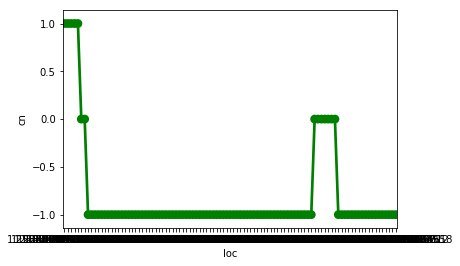

In [5]:
import seaborn as sns
%matplotlib inline

plot(pd_data,y_3d,'value')


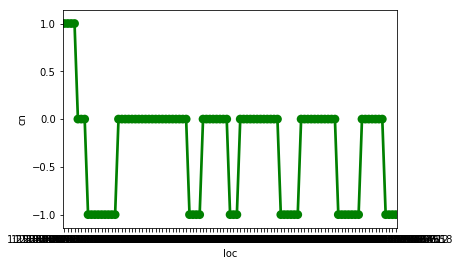

In [6]:
plot(pd_data2,y_test_3d,'value')

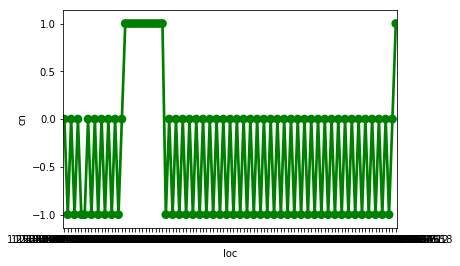

In [7]:
plot(pd_data,y_1d,'normalized')

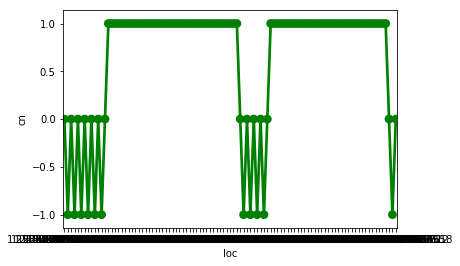

In [8]:
plot(pd_data2,y_test_1d,'normalized')